In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



# **Reading the file**

In [2]:
df = pd.read_csv('/kaggle/input/hotel-reservations/hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# **Data Info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


# **Data Preprocesing**
Removing null values

In [6]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df.drop(['company','agent'], axis =1, inplace = True)
df.dropna(inplace =True)

In [8]:
df = df[df['adr']<5000]
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


# **Data Analysis & Visualizations**

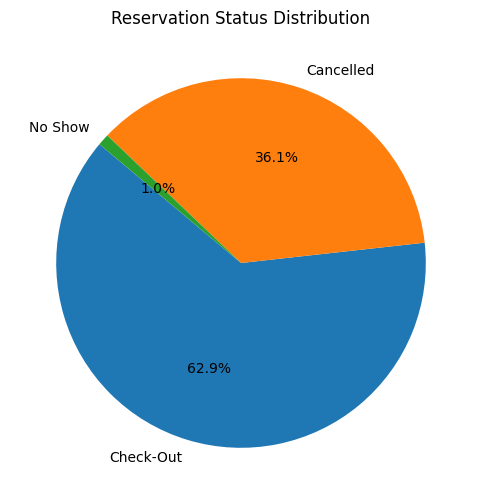

In [9]:
import matplotlib.pyplot as plt

# Calculate cancellation percentage
cancelled_perc = df['reservation_status'].value_counts(normalize=True)

# Define labels for each category
labels = ['Check-Out', 'Cancelled', 'No Show']

# Plotting a pie chart
plt.figure(figsize=(8, 6))  # Set the figure size (width, height) in inches

# Plotting the pie chart with specified labels and percentage formatting
plt.pie(cancelled_perc, labels=labels, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Reservation Status Distribution')

# Display the pie chart
plt.show()


## 36.1 percent are cancelled their reservation.

# **Cancelled ADR is high than not cancelled**

<Axes: xlabel='reservation_status', ylabel='adr'>

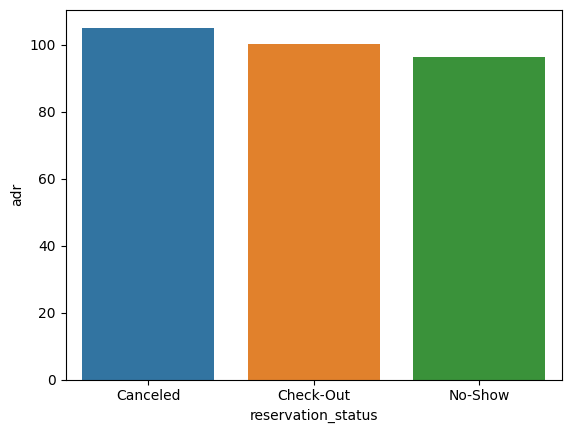

In [10]:
average_price_status = df.groupby('reservation_status')['adr'].mean().reset_index()
sns.barplot(data=average_price_status, x="reservation_status", y="adr")

In [11]:
average_price_status

,reservation_status,adr
0,Canceled,105.155838
1,Check-Out,100.210618
2,No-Show,96.426268


# Reservation status in resort and city hotels

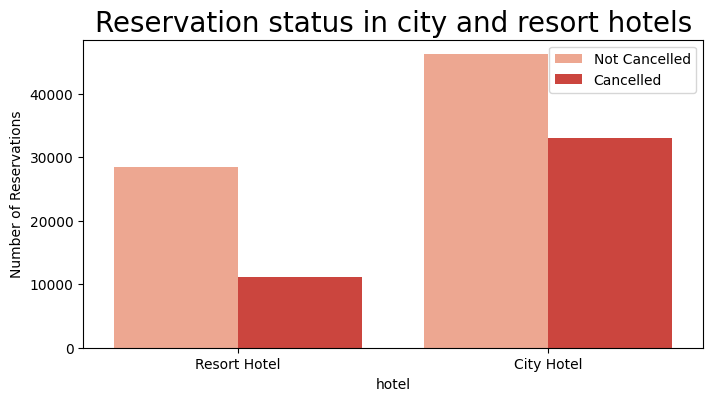

In [12]:
plt.figure(figsize=(8,4))
ax1 = sns.countplot(x = 'hotel', hue= 'is_canceled', data = df, palette ="Reds")
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in city and resort hotels', size= 20)
plt.xlabel('hotel')
plt.ylabel('Number of Reservations')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

In [13]:
# Filter the DataFrame for 'Resort Hotel' and 'City Hotel'
hotel_types = ['Resort Hotel', 'City Hotel']
filtered_df = df[df['hotel'].isin(hotel_types)]

# Calculate cancellation percentage for each hotel type
cancellation_perc = filtered_df.groupby(['hotel', 'is_canceled']).size().unstack() \
                               .apply(lambda x: x / x.sum() * 100, axis=1)

# Display cancellation percentages
print("reservation status for Resort Hotel:")
print(cancellation_perc.loc['Resort Hotel'])

print("\nreservation status for City Hotel:")
print(cancellation_perc.loc['City Hotel'])

# cancelation rate for resort hotel is : 27.9%
#cancelation rate for city hotels is: 41.7%
#City hotels have more cancellations than resort hotels.


reservation status for Resort Hotel:
is_canceled
0    72.024952
1    27.975048
Name: Resort Hotel, dtype: float64

reservation status for City Hotel:
is_canceled
0    58.291825
1    41.708175
Name: City Hotel, dtype: float64


#impact of special requests on reservation status

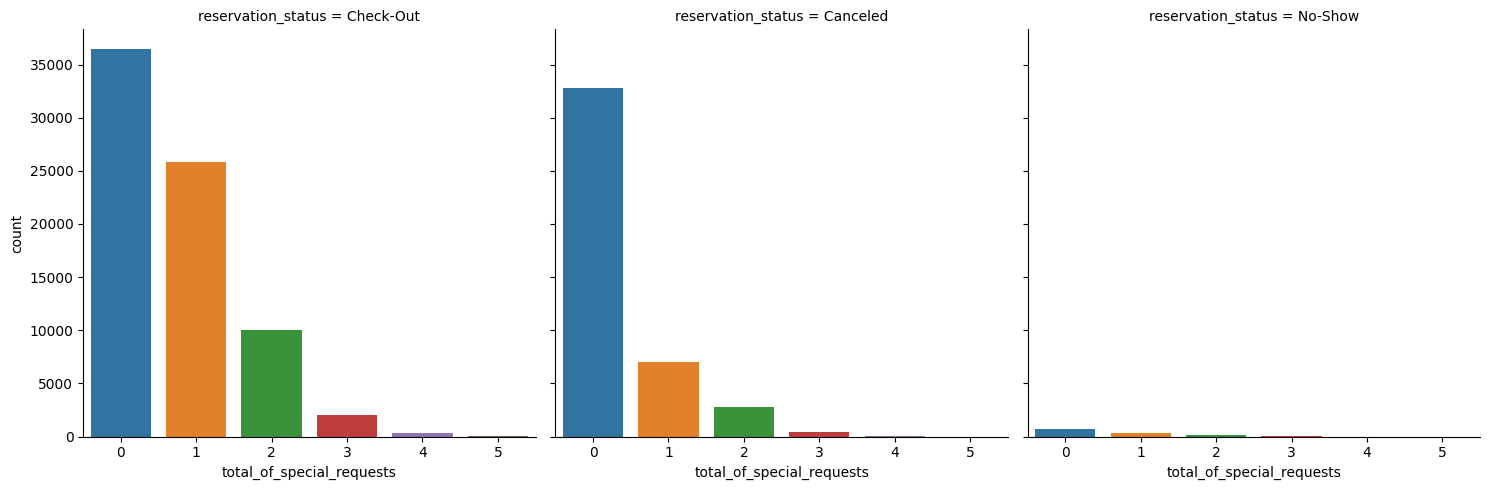

In [14]:
g = sns.catplot(df, x="total_of_special_requests", col='reservation_status', kind='count')

#If Special requestes are more than 2 then there is no cancellations observed.

# Effect of previous cancelations on reservation status

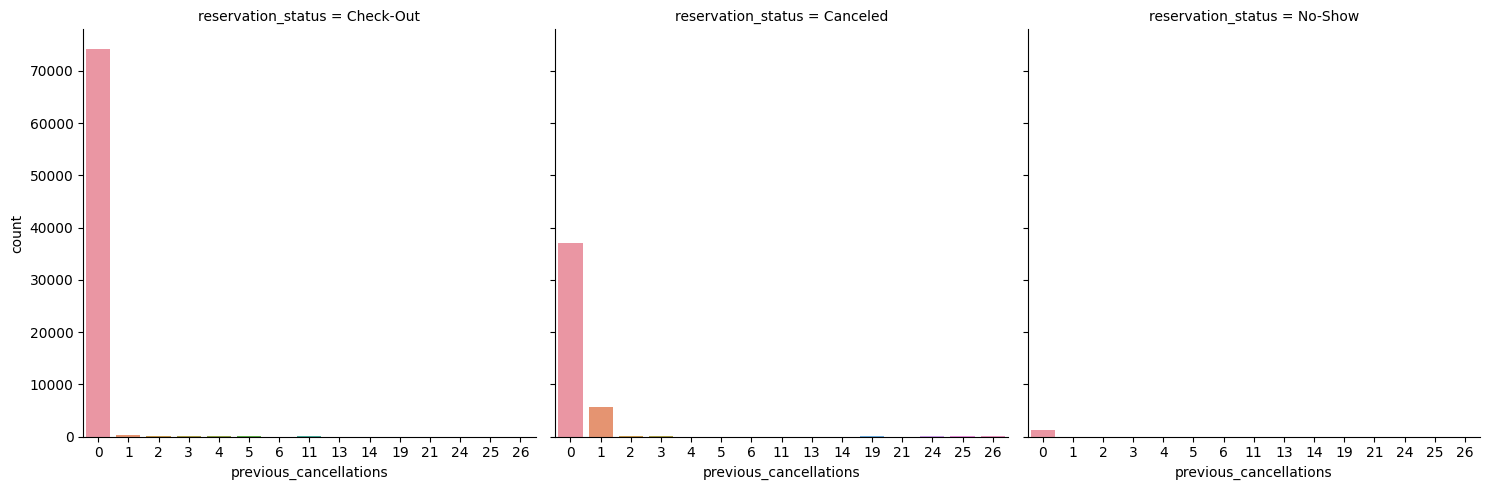

In [15]:
g = sns.catplot(df, x="previous_cancellations", col='reservation_status', kind='count')

# Reservation status per month

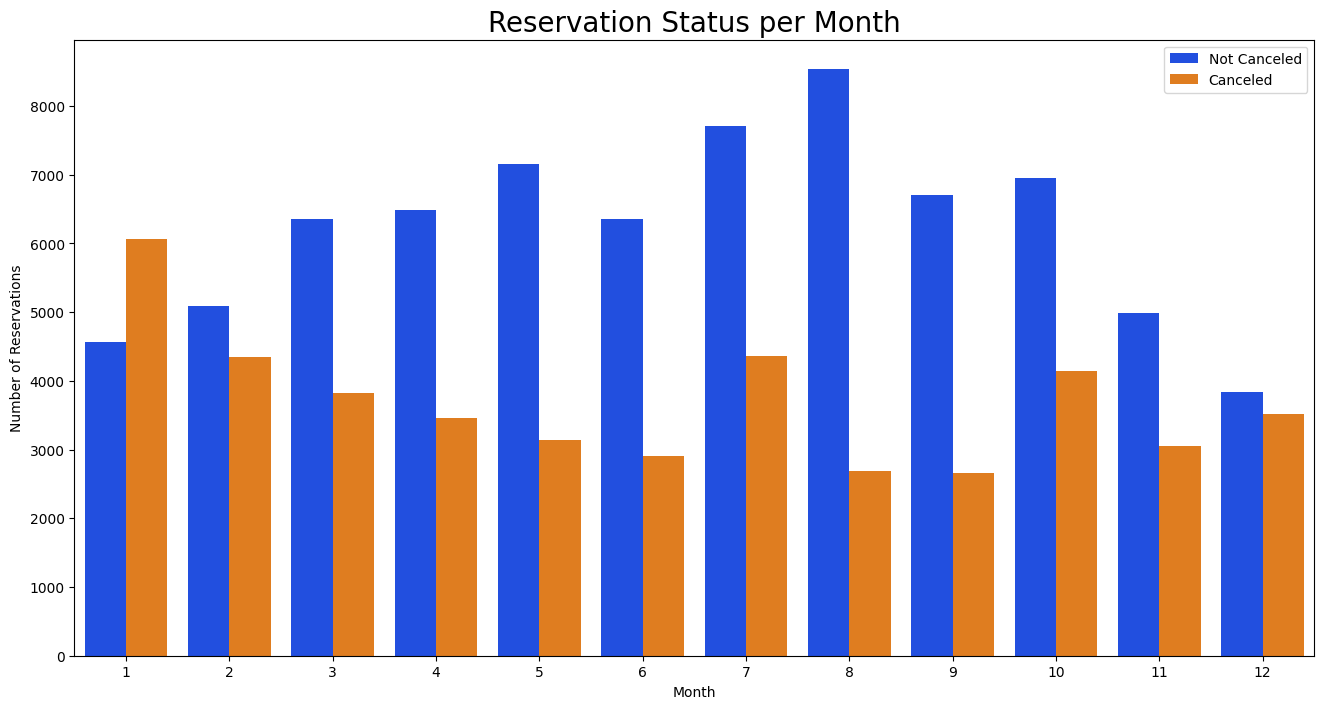

In [16]:


# Assuming 'reservation_status_date' needs to be converted to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract month from the reservation_status_date if it's a datetime object
df['month'] = df['reservation_status_date'].dt.month

# Plotting the count of reservations per month with cancellation status
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='month', hue='is_canceled', data=df, palette='bright')
plt.title('Reservation Status per Month', size=20)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(['Not Canceled', 'Canceled'])

plt.show()

# August month had more reservations and less cancellations.
#january had more cancellations and less reservations.
#july month had 2nd highest reservations and 2nd highest cancellations.


# ADR as per month

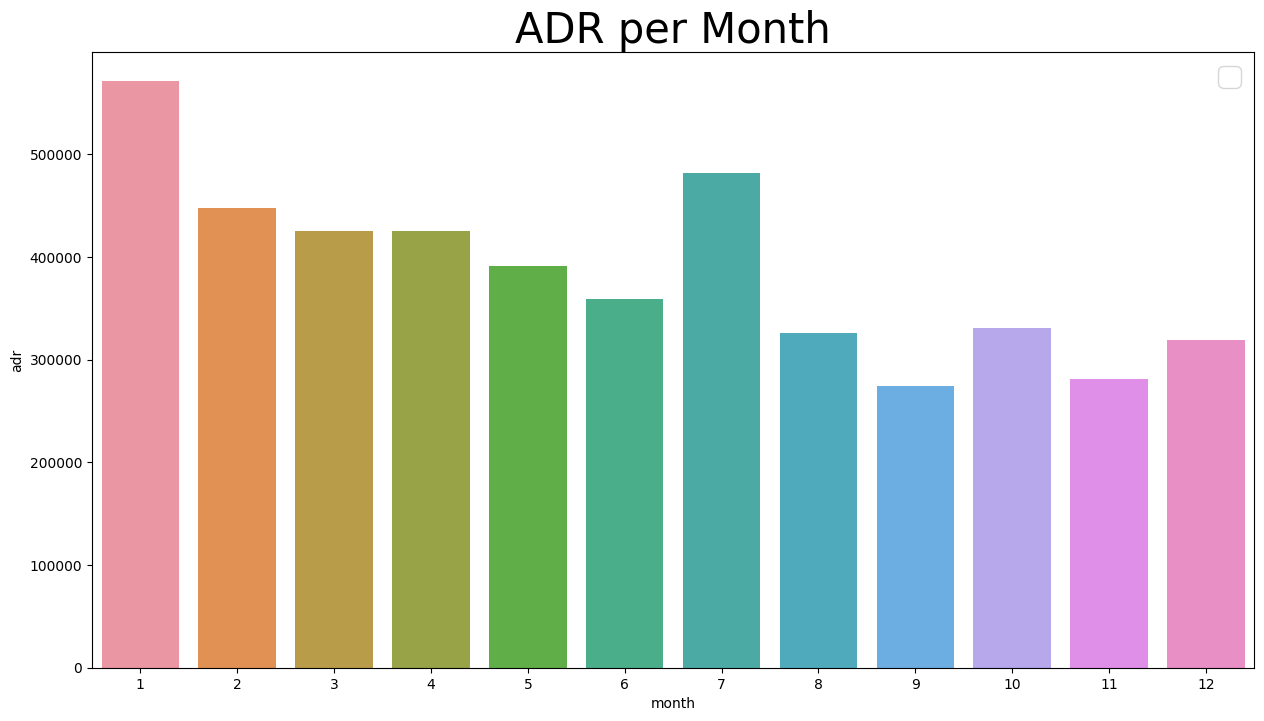

In [17]:
plt.figure(figsize = (15,8))
plt.title('ADR per Month', fontsize = 30)
# data =df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()

data = df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()
sns.barplot(x='month', y='adr', data = data )
plt.legend(fontsize = 20)
plt.show()

#January and July had more ADR compared to other months, probably this is the major reason for cancellation.

# Reservation cancellation per country

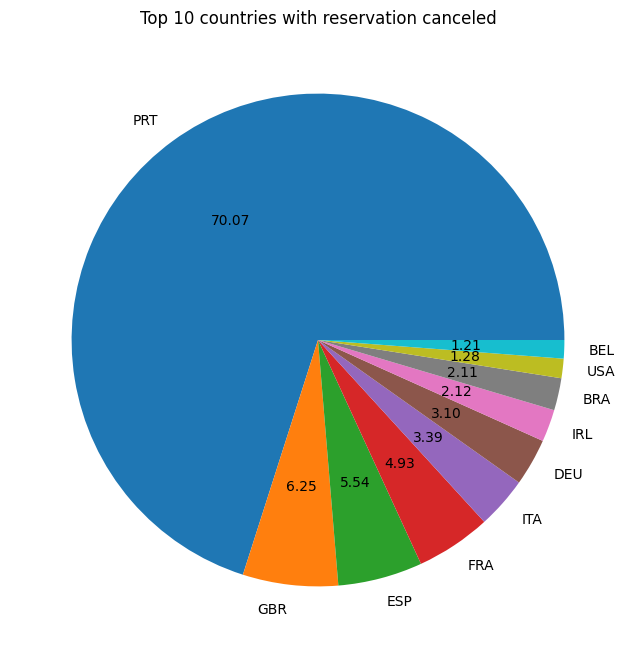

In [18]:
cancelled_data= df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct ='%.2f', labels = top_10_country.index)
plt.show()

# impact of meal plans on reservation status

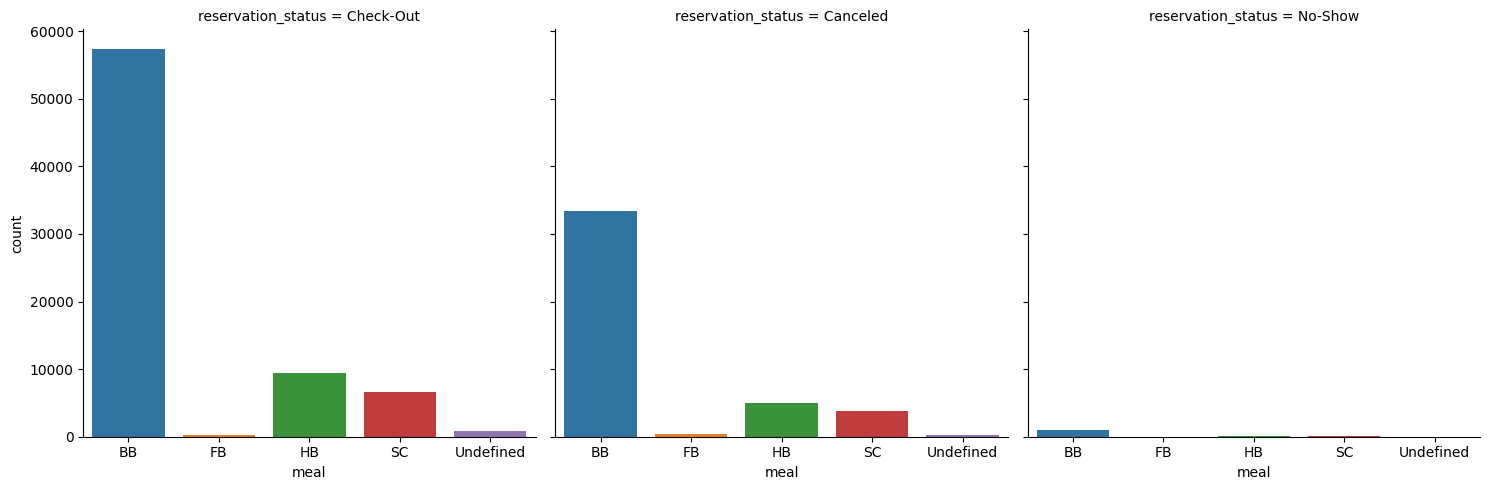

In [19]:
g = sns.catplot(df, x="meal", col='reservation_status', kind='count')

In [20]:
df['market_segment'].value_counts()
df['market_segment'].value_counts(normalize=True)
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

# Impact of Average Daily Rate by years

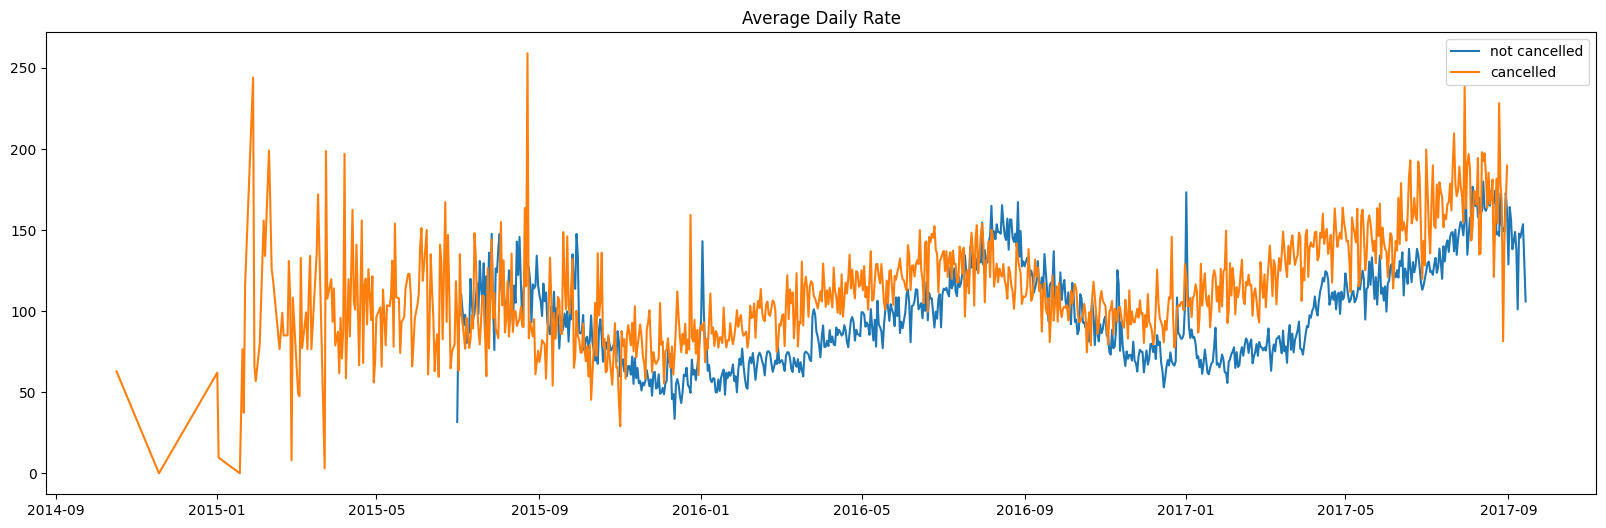

In [21]:
cancelled_df_adr= cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_df_adr= not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()
plt.show()

In [22]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]

not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

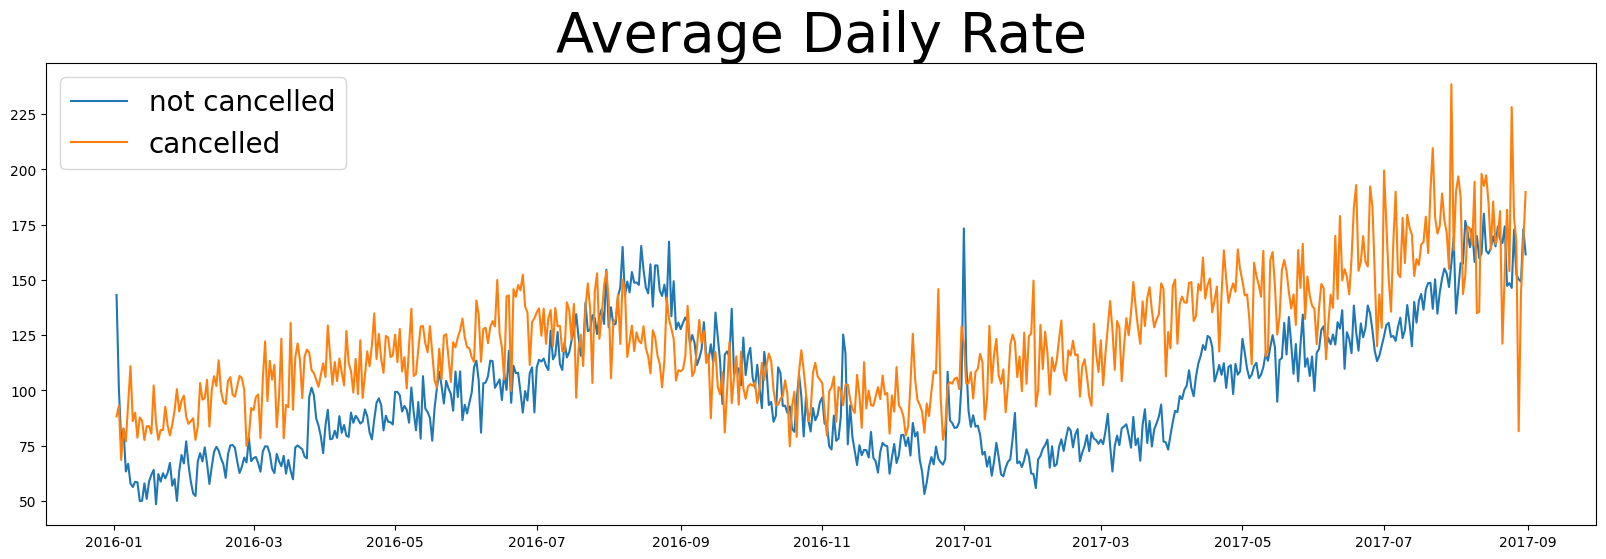

In [23]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]

not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate', fontsize = 40)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()